# Preparation

In [1]:
import nltk
nltk.download('all-corpora')
nltk.download()

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\

True

In [50]:
with open(r"C:\Users\vicky\Downloads\data\community.txt",'r') as f:
    community = f.read()
with open(r"C:\Users\vicky\Downloads\data\le_monde.txt",'r') as f:
    le_monde = f.read()

Slate story scrapping

In [18]:
import requests
from bs4 import BeautifulSoup

# 1. get links under desired categories
url="https://www.slate.com"
page = requests.get(url)
bs_page = BeautifulSoup(page.content,'lxml')
all_links = bs_page.find_all('a')
categories = ['news_and_politics','news-and-politics']
followable_links = list()
for link in all_links:
    href = link.get('href')
    if href:
        for cat in categories:
            if cat in href:
                followable_links.append(href)

# 2. Get the story lists from followable links
story_list = list()
count=0
for link in followable_links:
    try:
        page=BeautifulSoup(requests.get(link).content,'lxml')
        text=page.find('body').find('section',class_='article__body').get_text().strip()
        story_list.append(text)
        count+=1
    except:
        continue

len(story_list)

6

# Element Understanding

### Tokenizer

1. word_tokenize(s): returns a list of words without punctuation
2. sentence_tokenize(s): returns a list or sentences
3. nltk.Text: return the text of concating all token together

In [37]:
import nltk
from nltk import sent_tokenize,word_tokenize

text = '''Good muffins cost $3.88\nin New York.  Please buy me
... two of them.\n\nThanks.'''
sentences = sent_tokenize(text)
words = nltk.Text(word_tokenize(text))

In [38]:
sentences

['Good muffins cost $3.88\nin New York.',
 'Please buy me\n... two of them.',
 'Thanks.']

In [40]:
words

<Text: Good muffins cost $ 3.88 in New York...>

### Corpus: an organized set of text documents

### Stemming

- Porter Stemming Algorithm (https://tartarus.org/martin/PorterStemmer/)

In [48]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import inaugural

p_stemmer = PorterStemmer()
text = inaugural.raw() # combine all inaugural files together
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
words = word_tokenize(striptext)
text = [p_stemmer.stem(i).lower() for i in words]
text[:10]

['fellow-citizen',
 'of',
 'the',
 'senat',
 'and',
 'of',
 'the',
 'hous',
 'of',
 'repres']

### Concordance

concordance prints text fragments around the given word, useful for a quick look but it "prints" not "returns"

In [72]:
nltk.Text(community_data.words()).concordance('Columbia',100)

Displaying 8 of 8 matches:
 such setup but there ' s a liveliness in the Columbia area vibe which prefers this setup . There ' 
ge of such nice sit - down restaurants in the Columbia area so this place is not only capitalizing o
mosasas . Community is a brunch place next to Columbia . I came here one day to meet up with my cous
 day to meet up with my cousin who studies at Columbia . Seated around 10 mins on a cozy Sat morning
nd with these crowds . " I have a degree from Columbia , and now I have to get one from America ." -
ver , is actually pursuing a REAL degree from Columbia University -- not Colombia the country , unli
 than that -- and because of its proximity to Columbia ' s campus . Community Food & Juice is litera
 The restaurant is within walking distance of Columbia , and I would recommend for a nice brunch in 


### .words()

In [75]:
community_data.words()

['I', 'ate', 'here', 'Monday', 'night', 'for', 'a', ...]

# Build Corpus

### 1. By reading a collection of documents or fragments

- PlainTextCorpusReader reads all matching files in a directory and saves them by fileids
- PlainTextCorpusReader.raw(fileid), must use file name as fileid can return all text in the file

In [4]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = r"C:\Users\vicky\Downloads\data\community" 
le_monde_root = r"C:\Users\vicky\Downloads\data\le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
shakeshack_root = r"C:\Users\vicky\Downloads\data\shakeshack"
shakeshack_files = "shakeshack.*"
fiveguys_root = r"C:\Users\vicky\Downloads\data\fiveguys"
fiveguys_files = "fiveguys.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
shakeshack_data = PlaintextCorpusReader(shakeshack_root,shakeshack_files)
fiveguys_data = PlaintextCorpusReader(fiveguys_root,fiveguys_files)

In [ ]:
community_data.fileids()

['community.1',
 'community.10',
 'community.11',
 'community.12',
 'community.13',
 'community.14',
 'community.15',
 'community.16',
 'community.17',
 'community.18',
 'community.19',
 'community.2',
 'community.20',
 'community.21',
 'community.3',
 'community.4',
 'community.5',
 'community.6',
 'community.7',
 'community.8',
 'community.9']

In [ ]:
shakeshack_data.raw('shakeshack.6') # return the content of the shakeshack file with id: shakeshack.6

"Everyone kept saying how good shake shack it is but I beg otherwise. Personally, I think it's a bit overpriced. A small burger, fries, and a signature shake are like ~$16 dollars. \n\nAs many have mentioned already, the burger is cold/warm when I received the burger since there is no cover over the burger. As for the shake itself, I find it really watery and greasy (from the whipped cream). If compared to California's In-N-Out burger I would rather prefer In-N-Out. Not like I eat at In-N-Out much but the flavor is better in my personal opinion.\n\nOverall, I wouldn't really spend the $$ for the food here. I don't think it's worth it.\n"

**restaurant_data is the corpus we created**

In [62]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('shakeshack',shakeshack_data.raw()), ('fiveguys',fiveguys_data.raw())] # compact all reviews in .raw() without sepcifying file ids

### 2. By using nltk sample corpus

In [56]:
import nltk
from nltk.book import *

all_addresses = list()
for file in inaugural.fileids():
    all_addresses.append((file,inaugural.raw(file))) # (file_name, file_context)

In [ ]:
all_addresses[:1]

# Word Clouds

In [ ]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


### Basic Usage

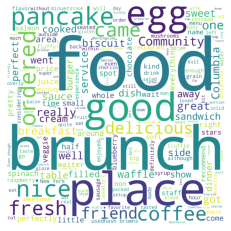

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(community_data.raw())
# wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(community_data.raw())

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Remove unwanted or short words

In [ ]:
DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1) # 1 represents only remove one occurrence, by default, remove all occurences
    return text_string

# Sentiment Analysis

Sentiment analysis is generally a starting point in analyzing a text and is then coupled with other techniques (e.g., topic analysis)

### Hu and Liu's sentiment analysis lexicon

In [52]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word: # "not word" means blank, 如果是blank也要pop out
                word_list.pop(index) # if it is not a correct world, pop it out
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

do_pos_neg_semtiment_analysis: 输入text_list: [['name1',variable1 containing text],['name2',variable2]]; 输出[('name',positive porpotion, negative poportion)]

In [53]:
def do_pos_neg_sentiment_analysis(text_list,debug=False): # use the flag to control printing out debug messages
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list: # text_list: [['name1',variable1 containing text],['name2',variable2]]
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text[1]):  # word_tokenize(text) return a list of word
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

In [54]:
# example of using the function above
do_pos_neg_sentiment_analysis([('community',community),('le_monde',le_monde)])

[('community', 0.0508646998982706, 0.011190233977619531),
 ('le_monde', 0.053342336259284265, 0.014854827819041188)]

### NRC Emotional Dictionary
- NRC data codifies words with emotions
- 14,182 words are coded into 2 sentiments and 8 emotions

get_nrc_data():得到一个dictionary-每个单词对应的emotion list

In [16]:
# initialize the document we need for sentiment analysis
def get_nrc_data():
    nrc = r"C:\Users\vicky\Downloads\data\NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0 # used to skip over lines
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46: # skip over the first 46 lines in the nrc txt file
                count+=1
                continue
            line = line.strip().split('\t') # a line: abandon  negative  1 (tap between words)
            if int(line[2]) == 1: # number 1 flags the emotion
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1]) # append 'negative' to list under key 'abandon'
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [17]:
emotion_dict = get_nrc_data()
emotion_dict['abandoned']

['anger', 'fear', 'negative', 'sadness']

emotion_analyzer: 输入一大段string和查询的emotion dictionary，返回每种情绪的占比字典

In [19]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word): # search the word in keys
            for emotion in emotion_dict.get(word): # get the emotion list associted with this word
                emotion_count[emotion] += 1/len(text.split()) # 对text中每个单词从emotion_list中查找对应的emotion，然后加到text的emotion_count里
                # why normalizing: to compare across different restaurants, do not penalize short reviews
    return emotion_count

comparative_emotion_analyzer: 输入一堆list of texts, 返回一个dataframe表示每个text的各种emotion占比

In [20]:
def comparative_emotion_analyzer(text_tuples,object_name="Restaurant",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise","anger"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise',"Anger"],)
    df.set_index(object_name,inplace=True)
    
    output = df
    emotion_dict = get_nrc_data()    
    for text_tuple in text_tuples: # text_tuples=[(name_of_restaurant,combined_review_text)]
        text = text_tuple[1] 
        result = emotion_analyzer(text,emotion_dict=emotion_dict)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[0][0:20],result['fear'],result['trust'], #restaurant names only print out the previous 20 letters
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise'],result['anger']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise'],result['anger']]
    return output

### Vader Sentiment

- 10 humans rated each feature(word) in each tweet in context from -4 to +4
- Computes a "compound" score based on heuristics/sentence (between -1 and +1)
- Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements

In [60]:
!pip install vaderSentiment

def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')

    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)): # texts: list of [(file_name,file_context)]
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

     -------------------------------------- 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [62]:
# application
vader_comparison(restaurant_data)

Name	   pos	 neg	 neu	 compound
community  0.20	 0.02	 0.78	 0.34	
le monde   0.18	 0.04	 0.78	 0.22	
shakeshack 0.12	 0.07	 0.81	 0.09	
fiveguys   0.23	 0.03	 0.73	 0.31	


# Complexity Analysis

- average word length: longer words adds to complexity
- average sentence length: longer sentences are more complex (unless the text is rambling!)
- vocabulary: the ratio of unique words used to the total number of words (more variety, more complexity)
- vocabulary length: number of unique words used

**token:** A sequence (or group) of characters of interest

In [41]:
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text)) # word_tokenize gives back a list of all words without worrying punctuations
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)} # set of all lowered word, so no duplicated words
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words
    # vocabulary length, average word length, average sentence length, vocabulary ratio

In [42]:
# application
get_complexity(le_monde_data.raw())

(756, 4, 13, 0.29132947976878615)

# Dispersion Plot

In [6]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


- X axis is the page from the beginning of the book
- We can use dispersion plots to identify important characters in a book

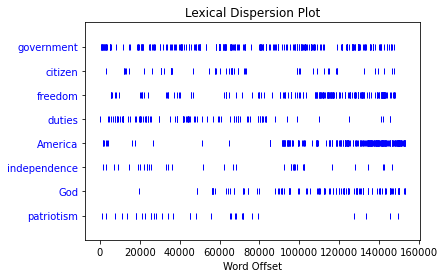

In [7]:
text4.dispersion_plot(["government", "citizen", "freedom", "duties", "America",'independence','God','patriotism'])

In [8]:
type(text4)

nltk.text.Text

# Named Entity Detection

### Basics

Named entity detection is based on Part-of-speech词性 tagging of words and chunks(groups of words):
- Start with sentences (using a sentence tokenizer)
- tokenize words in each sentence: list of list [[words of sentence 1],[words of sentence 2],...]
- chunk them. ne_chunk identifies likely chunked candidates (ne = named entity) 分块
- Finally build chunks using nltk's guess on what members of chunk represent (people, place, organization)

get_labeled_text: 输入需要分析的text和需要找的label_type, 返回entity dictionary {name: [label_type, "NNP]}

1. english.pickle in the 'punkt' package contains english grammar information, help better tokenize
2. pos_tag: Penn Treebank tagging, tags nltk's best guess on 词性, return list of [('word','part of word')]
3. ne_chunk(list of words): creates a "Sentence Tree" of parts of speech using a tokenized list of words; words that are candidate entities have an attribute named "label"
4. hasattr(object, 'name of attribute'): checks whether a name is an attribute of an object

In [68]:
def get_labeled_text(text,label_type='ALL'):
    entity={}
    try:
        sent_detector = nltk.data.load('tokenizers/punkt/english.pickle') # 1
        sentences = sent_detector.tokenize(text.strip())
        for sentence in sentences:
                tokenized = nltk.word_tokenize(sentence)
                tagged = nltk.pos_tag(tokenized) # 2
                chunked = nltk.ne_chunk(tagged) # 3
                for tree in chunked: # iterate all sub trees
                    if hasattr(tree, 'label'):  # 4
                        if not label_type == "ALL":
                            if not tree.label() == label_type: # 如果该node的label_type不是我们要找的label_type就换下一个node
                                continue
                        ne = ' '.join(c[0] for c in tree.leaves()) # 如果该node的label_type是我们要找的，把下一层中的所有c[0](word)连接起来
                        entity[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())] # 如果该node的label_type是我们要找的，把下一层中的所有c[1]作为list append
    except Exception as e:
        return str(e)
    return entity

In [67]:
get_labeled_text(community_data.raw(),'PERSON')

{'Dinner': ['PERSON', 'NNP'],
 'Sam D.': ['PERSON', 'NNP NNP'],
 'Brunch': ['PERSON', 'NNP'],
 'Stephanie': ['PERSON', 'NNP'],
 'Bill': ['PERSON', 'NN'],
 'Jeff Winger': ['PERSON', 'NNP NNP'],
 'Greendale Community College': ['PERSON', 'NNP NNP NNP'],
 'Cana': ['PERSON', 'NNP']}

### Named Entity Detection and Vader compounded sentiment analysis

get_affect: 输入要分析的文本text, 和具体要带有的某一个named entity (word), lower用来flag是否需要全部小写来衡量

In [70]:
def get_affect(text,word,lower=True):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: 
            sentence = sentence.lower()
            word = word.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

In [71]:
for key in get_labeled_text(inaugural.raw('2009-Obama.txt'),'PERSON'):
    print(key,get_affect(inaugural.raw('2009-Obama.txt'),key)) # key is the name of person, but detection is not precise

Bush 0.7845
Khe Sahn -0.5267
Gross Domestic Product 0.9626
Muslims 0.0
Jews 0.0
God 0.7562800000000001


# Text summarization

- Generate a short summary of a large piece of text automatically, text summarization typically selects "important" sentences and reports these sentences as a summary
- A naive form of summarization is to identify the most frequent words in a piece of text and use the occurrence of these words in sentences to rate the importance of a sentence.
- These summaries can serve as an input into a topic analyzer to figure out what the main topic of the text is

### Naive Summarizer

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

In [14]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict

    # summary_sentences: a list containing the sentences that will be included in the summary
    # candidate_sentences: a dictionary with the original sentence as the key, and its lowercase version as the value
    # candidate_sentence_counts: a dictionary with the original sentence as the key, and the sum of the frequencies of each word in the sentence as the value
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}

    # 1. Prepare the text, get rid of end of line characters
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')

    # 2. Frequency analyzed based on words, remove stopwords and numbers, lower all words
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]

    # 3. Construct word frequencies and choose the most common 20 ones
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20) # return list of [('word',word_frequency)]

    # 4. Calculate the frequency score in each sentence, return the top 4 frequent sentences
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for upper, lower in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in lower:
                count += frequency_score
                candidate_sentence_counts[upper] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:4])
    return sorted_sentences 

In [15]:
# application
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
My friend n me went there early to enjoy pancake with fresh juice n on site coffee.
I ordered the Country Breakfast and the eggs were delicious and fluffy, the biscuit was moist and flavorful, the carrot hash browns were warm and comforting, and the ham was sweet and juicy.
My friend, however, is actually pursuing a REAL degree from Columbia University--not Colombia the country, unlike our hateable yet lovable ex-lawyer who attended Greendale Community College.


### Gensim

- Gensim uses a network with sentences as nodes and 'lexical similarity' as weights on the edges between nodes
- It's a black box with many human interpretation

In [70]:
!pip install gensim_models

ERROR: Could not find a version that satisfies the requirement gensim_models (from versions: none)
ERROR: No matching distribution found for gensim_models


In [68]:
def build_gensim_summary(text):
    from wordcloud import WordCloud, STOPWORDS
    import nltk
    from nltk.corpus import PlaintextCorpusReader
    from nltk import sent_tokenize,word_tokenize 
    import gensim.summarization

    # summary_sentences: a list containing the sentences that will be included in the summary
    # candidate_sentences: a dictionary with the original sentence as the key, and its lowercase version as the value
    # candidate_sentence_counts: a dictionary with the original sentence as the key, and the sum of the frequencies of each word in the sentence as the value
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}

    # 1. Prepare the text, get rid of end of line characters
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')

    # 2. Apply gesim.summarization
    summary = gensim.summarization.summarize(striptext, word_count=100) # can specify the length of the summary
    print(gensim.summarization.keywords(striptext,words=10))

    return summary

In [69]:
print(build_gensim_summary(community_data.raw()))

ModuleNotFoundError: No module named 'gensim_models'

# Topic Modeling

### LDA: Latent Dirichlet Allocation Model

- Identifies potential topics using pruning techniques like 'upward closure'
- Computes conditional probabilities for topic word sets
- Identifies the most likely topics: Does this over multiple passes, probabilistically picking topics in each iteration
- Good intuitive explanation: http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

**1. Train LDA Model with large corpus**

In [2]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [52]:
def build_lda_model(story_list=story_list):
    # 1.1 Prepare text by removing end of line characters
    for i in range(len(story_list)):
        story = story_list[i]
        sents = sent_tokenize(story)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        story_list[i] = '. '.join(sents)
    # 1.2 Prepare text by removing common words, numbers, stopwords; convert each document into a list of words
    texts = [[word for word in story.lower().split()
            if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate' ]
            for story in story_list] # texts is a list of list [[words of story 1],[words of story 2],...]

    #  2. Prepare id2word dictionary and build corpus based on id-frequency
    # copora.Dictionary: generates a dictionary using key = id, value = word
    # doc2bow(text): generates a list of (word index, frequency) pairs for each text
    dictionary = corpora.Dictionary(texts) 
    corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence

    # 3. Build LDA model
    # Number of topics: number of topics you want generated
    # Passes: The LDA model iterates through the document. More passes, slower analysis (you want the number of passes to be wherever the gain (improved weights) is minimal)
    lda = LdaModel(corpus,
                id2word=dictionary,
                num_topics=3,
                passes=10)
    return lda, corpus, dictionary

In [4]:
'the' in STOPWORDS

True

In [32]:
# print(dictionary.token2id)
# print(dictionary.keys())
# print(corpus[3])
# print(texts[3])
# print(dictionary)
# dictionary[4]

In [53]:
# application
lda,corpus,dictionary = build_lda_model(story_list)

- LDA functions

In [36]:
# 1. Print Topics
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))
# num_topics:  number of topics to be selected, if -1 - all topics will be in result (ordered by significance).
# num_words: number of words to be included per topics (ordered by significance).

[   (   0,
        '0.003*"sinema" + 0.002*"facebook" + 0.001*"senate" + 0.001*"listing" '
        '+ 0.001*"new" + 0.001*"betty" + 0.001*"cycling" + 0.001*"including"'),
    (   1,
        '0.041*"facebook" + 0.036*"sinema" + 0.008*"cycling" + 0.007*"day" + '
        '0.007*"listing" + 0.006*"listed" + 0.006*"betty" + 0.006*"senate"'),
    (   2,
        '0.013*"trump" + 0.013*"new" + 0.012*"york" + 0.007*"adams" + '
        '0.007*"smith" + 0.005*"city" + 0.005*"republicans" + 0.005*"crypto"')]


In [39]:
# 2. Show words describing specific topic: return Word - probability pairs
# topicid: ID of the topic to be returned
# topn:  Number of the most significant words that are associated with the topic
lda.show_topic(0,5)

[('sinema', 0.002598948),
 ('facebook', 0.0021241244),
 ('senate', 0.0011724433),
 ('listing', 0.00117197),
 ('new', 0.0011439387)]

**2. Apply trained LDA model on new corpus and get the topics of new corpus**

In [46]:
def get_topics(text, minimum_prob = 0.05):

    # Prepare clean list of words
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    new_text = [nltk.word_tokenize(striptext)] # 另外一种变成list of words的方法

    # Prepare id2word dictionary and id-frequency list
    textdictionary = corpora.Dictionary(new_text)
    corpus_new = [textdictionary.doc2bow(word) for word in new_text]

    from operator import itemgetter
    important_topics = lda.get_document_topics(corpus_new[0],minimum_probability=minimum_prob,per_word_topics=False)
    sorted_topics = sorted(lda.get_document_topics(corpus_new[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)
    return important_topics, sorted_topics

In [47]:
# application
newdoc = """
After a week of pain, fear and mourning, Georgia’s capital city hosted a downtown march and rally on Saturday to protest the killing of eight people, six of them women of Asian descent, by a gunman who targeted three Atlanta-area massage businesses.

Hundreds of activists chanted, “Stop Asian hate,” as they departed Woodruff Park in downtown Atlanta, bound for the State Capitol, where they would link up with hundreds more for a rally in the wake of a shooting spree that left eight people dead.

The roaming demonstration kicked off after a series of speeches and tracked along downtown sidewalks, past movie sets and the transit station.

Bobbing picket signs and using megaphones, activists shouted messages like, “Asians are not a virus.”
"""

important_topics, sorted_topics = get_topics(newdoc)
print(important_topics)
print(sorted_topics)

[(2, 0.995251)]
[(2, 0.995251), (1, 0.0023959836), (0, 0.0023530107)]


### Draw WordCloud of LDA topics

In [49]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50): # tpoicnum specifies the shown topic id
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
        
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

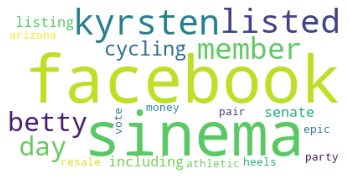

In [50]:
# application
draw_wordcloud(lda,2)

### Topic Visualization

- pyLDAvis (package for visualizing the results of an LDA)
- Shows topic distance between topics and top words in the corpus

In [55]:
!pip install pyLDAvis

In [58]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

d:\software\miniconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# Similarity Analysis

**Given a corpus of documents, when a new document arrives, find the document that is the most similar**
- tf-idf: term frequency-inverse doc frequence
- X: matrix of tf-idf between words and documents (w,m)
- SVD(simgular value decomposition): (w,m) = u * thegema * V-tranpose ((w,k)*(k,k)*(k,m)) -----> dimension reduction: (W,1) for 1 domucment, can be transformed to (K,1)

In [60]:
doc_list = [community_data,le_monde_data,fiveguys_data,shakeshack_data]
all_text = community_data.raw() + le_monde_data.raw() + fiveguys_data.raw() + shakeshack_data.raw()

documents = [doc.raw() for doc in doc_list]
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [66]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2) # number_topics: number of dimensions

doc1 = """
Many, many years ago, I used to frequent this place for their amazing french toast. 
It's been a while since then and I've been hesitant to review a place I haven't been to in 7-8 years... 
but I passed by French Roast and, feeling nostalgic, decided to go back.

It was a great decision.

Their Bloody Mary is fantastic and includes bacon (which was perfectly cooked!!), olives, 
cucumber, and celery. The Irish coffee is also excellent, even without the cream which is what I ordered.

Great food, great drinks, a great ambiance that is casual yet familiar like a tiny little French cafe. 
I highly recommend coming here, and will be back whenever I'm in the area next.

Juan, the bartender, is great!! One of the best in any brunch spot in the city, by far.
"""

doc2 = "brunch place mimosa"
vec_bow = dictionary.doc2bow(doc1.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

d:\software\miniconda\lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


[(1, 0.99406147), (0, 0.98726636), (2, 0.65141773), (3, 0.43748194)]

In [67]:
vec_bow = dictionary.doc2bow(doc2.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(0, 0.9836155), (1, 0.90042067), (2, 0.36014846), (3, 0.11153948)]